#APLICANDO AO MEU GRAFO

In [76]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt

In [77]:
class OpenGraph:
    def __init__(self, archive):
        self.nvertex, self.adjmatrix, self.adjlist = self.openFile(archive)
        self.edges = []

    def openFile(self, archive):
        with open(archive, 'r') as file:
            nvertex = int(file.readline())
            line = file.readlines()
            adjmatrix = [list(map(lambda x: int(x), l.split())) for l in line[0:]]
            adjlist = [[] for _ in range(nvertex)]

            for i in range(nvertex):
                for j in range(nvertex):
                    if adjmatrix[i][j] == 1:
                        adjlist[i].append(j)

        return nvertex, adjmatrix, adjlist

    def printMatrix(self):
        print("Adjacency Matrix:")
        print(" ", np.arange(1, len(self.adjmatrix)+1, 1))
        for i, l in enumerate(self.adjmatrix):
            print(f'{i} |{" ".join(map(str, l))}')

    def printList(self):
        print("\nAdjacency List:")
        for i, ladj in enumerate(self.adjlist):
            print(f'{i}: {"-> ".join(map(str, ladj))}')
            
    def Edges(self): # getting all graph edges
      for i in range(0, len(self.adjlist)): 
        for j in self.adjlist[i]: 
          if (j,i) not in self.edges: #nao quero que seja uma tupla, pois nao poderei modificar
            self.edges.append((i,j)) 
      #print("Edges: ",  self.edges)
      return self.edges

In [78]:

class Karger:
    def __init__(self, vertices,edges):        
        self.V = vertices
        self.edges = edges
        
        
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
    
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
            
    def indice(self, aresta, edges):
        index = None
        for i, edge in enumerate(edges):
            if edge == aresta:
                index = i
                break
        return index
            
    def kargerMinCut(self, n_iter):
        
        edgeslist = copy.deepcopy(self.edges)
        minCut = [] 
        corteminimo = []
        while (n_iter > 0):
            
            parent = [i for i in range(self.V)]
            rank = [0] * self.V
            v = self.V #size
            while v > 2:
                #ESCOLHENDO AS ARESTAS
                i = random.randint(0, len(edgeslist) - 1)
                u, w = edgeslist[i]
                setU = self.find(parent, u)
                setW = self.find(parent, w)
            
                if setU != setW: #
                    v -= 1
                    self.union(parent, rank, setU, setW)
                edgeslist.pop(i)

            
            cut = 0
            for u, w in edgeslist:
                setU = self.find(parent, u)
                setW = self.find(parent, w)
                if setU != setW:
                    cut += 1
            n_iter -= 1
            
            n = len(edgeslist)
            #print("Aresta Final:", edgeslist) #arestas finals nao utilizadas
            edgeslist = copy.deepcopy(self.edges)
            corteminimo.append(cut) #corte minimo da interação atual
        minCut = min(corteminimo)

        return minCut

        
        
        

In [79]:
#OPEN GRAPH
archive = 'graph02.txt'
graph = OpenGraph(archive)
#graph.printMatrix()
#graph.printList()
arestas = graph.Edges()
#print("Arestas: ",arestas)

In [80]:
# Create a graph
g = Karger(graph.nvertex, arestas);
nexec = 1000
niteraction = [1,2, 3, 4, 5,6,7,8,9,10,20,30]
cortes = [[] for _ in range(nexec)]

for j in range(nexec):
    for iter in niteraction:
        cortes[j].append(g.kargerMinCut(iter));


#Menor corte em toda a rodagem
minimo = min(min(corte) for corte in cortes)
#vetor para armazenar as contagens do corte minimo
nmincut = [0] * len(niteraction)

# Calcule a média de cada coluna
for vetor in cortes:
    for i, valor in enumerate(vetor):
        if valor == minimo:
            nmincut[i] += 1

# Divida cada soma pelo número de listas para obter a média
probabilidade = [i / nexec for i in nmincut]




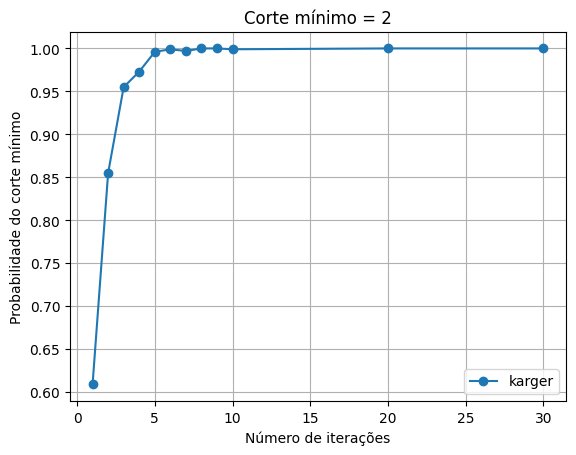

In [81]:

plt.plot(niteraction, probabilidade, marker='o',label='karger')
plt.xlabel('Número de iterações')
plt.ylabel('Probabilidade do corte mínimo')
plt.title(f'Corte mínimo = {minimo}')
plt.grid(True)
plt.legend()
plt.show()